<a href="https://colab.research.google.com/github/kruho/colab/blob/master/recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
a=3

In [0]:
a

3

# MNISTデータをダウンロードする

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

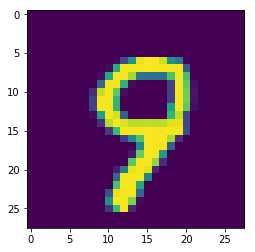

In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_train[11223])

In [0]:
y_train[11223]

9

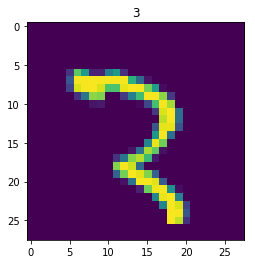

In [0]:
plt.imshow(x_train[500])
plt.title(y_train[500]);

# データの前処理

In [0]:
x_train.min(), x_train.max()

(0, 255)

In [0]:
x_train = x_train / 255.
x_test = x_test / 255.

In [0]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [0]:
x_train = x_train.reshape((60000,28,28,1))

In [0]:
x_test = x_test.reshape((10000,28,28,1))

In [0]:
x_input_train = x_train[:50000]
x_input_val = x_train[50000:]
x_input_test = x_test

In [0]:
import numpy as np

y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

In [0]:
y_train[0],y_train_onehot[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [0]:
y_output_train = y_train_onehot[:50000]
y_output_val = y_train_onehot[50000:]
y_output_test = y_test_onehot

# ニューラルネットを作る

In [0]:
from keras.layers import Input, BatchNormalization, Activation, Conv2D, GlobalAveragePooling2D

In [0]:
input_tensor = Input((28,28,1))

In [0]:
if False:
  h = Conv2D(32, (3,3), padding='same', strides=2)(input_tensor)
  h = BatchNormalization()(h)
  h = Activation('relu')(h)

  h = Conv2D(10, (3,3), padding='same', strides=2)(h)
  h = BatchNormalization()(h)

  h = GlobalAveragePooling2D()(h)
  output_tensor = Activation('softmax')(h)
  
if True:
  h = Conv2D(16, (3,3), padding='same')(input_tensor)
  h = BatchNormalization()(h)
  h = Activation('relu')(h)

  h = Conv2D(32, (3,3), padding='same', strides=2)(h)
  h = BatchNormalization()(h)
  h = Activation('relu')(h)

  h = Conv2D(32, (3,3), padding='same')(h)
  h = BatchNormalization()(h)
  h = Activation('relu')(h)

  h = Conv2D(64, (3,3), padding='same', strides=2)(h)
  h = BatchNormalization()(h)
  h = Activation('relu')(h)

  h = Conv2D(10, (3,3), padding='same')(h)
  h = BatchNormalization()(h)

  h = GlobalAveragePooling2D()(h)
  output_tensor = Activation('softmax')(h)
  

In [0]:
from keras.models import Model

predictor = Model(input_tensor, output_tensor)

In [0]:
predictor.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
predictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_24 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_25 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_25 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
activation_26 (Activation)   (None, 14, 14, 32)        0         
__________

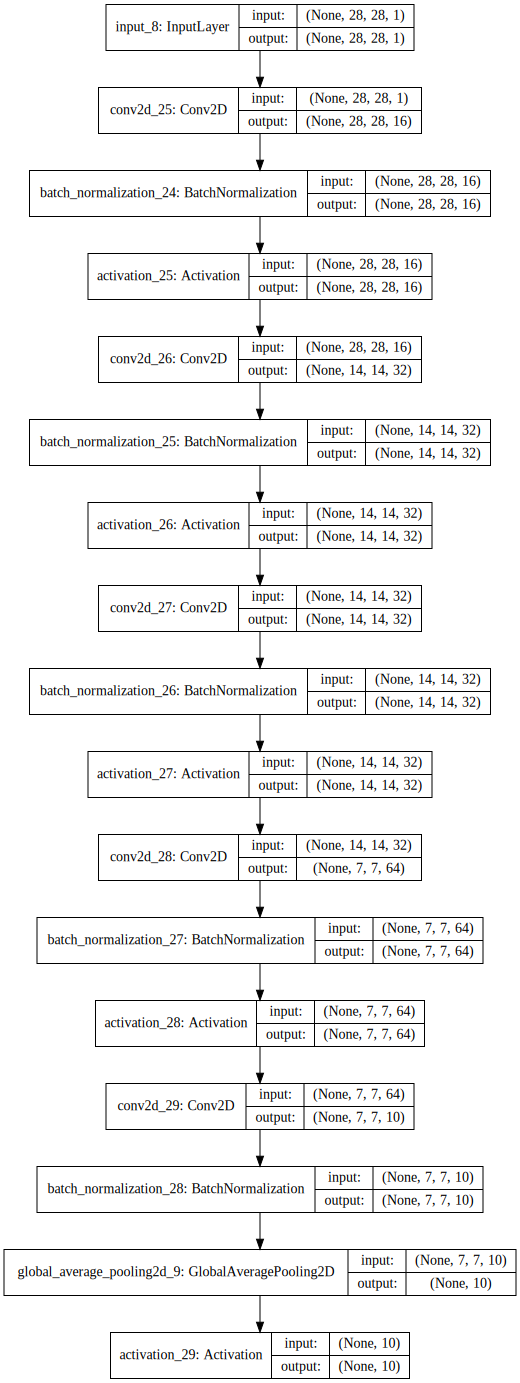

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(predictor, show_shapes=True).create(prog='dot', format='svg'))

# 訓練する

In [0]:
hist = predictor.fit(
    x = x_input_train,
    y = y_output_train,
    batch_size=100,
    epochs = 20,
    validation_data = (x_input_val, y_output_val),
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 235us/step - loss: 0.7881 - val_loss: 0.4671
Epoch 2/20
50000/50000 [==============================] - 8s 159us/step - loss: 0.3358 - val_loss: 0.2489
Epoch 3/20
50000/50000 [==============================] - 8s 160us/step - loss: 0.2154 - val_loss: 0.2521
Epoch 4/20
50000/50000 [==============================] - 8s 160us/step - loss: 0.1559 - val_loss: 0.1375
Epoch 5/20
50000/50000 [==============================] - 8s 161us/step - loss: 0.1199 - val_loss: 0.1202
Epoch 6/20
50000/50000 [==============================] - 8s 160us/step - loss: 0.0952 - val_loss: 0.1343
Epoch 7/20
50000/50000 [==============================] - 8s 166us/step - loss: 0.0781 - val_loss: 0.0845
Epoch 8/20
50000/50000 [==============================] - 8s 161us/step - loss: 0.0659 - val_loss: 0.0914
Epoch 9/20
50000/50000 [==============================] - 8s 159us/step - loss: 0.0565 - val_loss: 0.

In [0]:
hist.history

{'loss': [0.7880935510993003,
  0.3357834879159927,
  0.2153834563791752,
  0.15594873321056366,
  0.11993046601861715,
  0.0951636492460966,
  0.0781377060264349,
  0.06591904440522194,
  0.056468807965517044,
  0.04899914848059416,
  0.041898174680769444,
  0.036339225901290774,
  0.03160785274021328,
  0.028337585363537074,
  0.024434575472027063,
  0.021911694483831526,
  0.019755636396817863,
  0.017313169624656437,
  0.014691527940798551,
  0.013815108737442643],
 'val_loss': [0.4671429488062859,
  0.24891194388270377,
  0.2521158228069544,
  0.1374983985349536,
  0.12022523414343596,
  0.1342546119913459,
  0.08448758568614721,
  0.09135599603876471,
  0.10068965209648013,
  0.060074993129819634,
  0.15113227244466543,
  0.05156740322709084,
  0.06318134865257889,
  0.06022432126104832,
  0.0668417846923694,
  0.06544626015238464,
  0.09327259648125619,
  0.05341283787507564,
  0.09162436778657139,
  0.03845846266602166]}

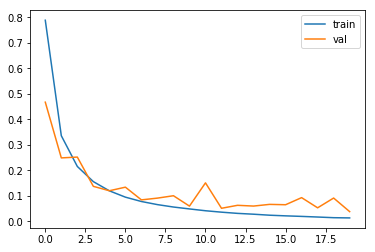

In [0]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()

# テストする

In [0]:
pred = predictor.predict(x_input_test)

Text(0.5, 1.0, '7')

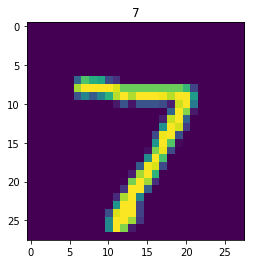

In [0]:
plt.imshow(x_input_test[0].squeeze())
plt.title(pred[0].argmax())

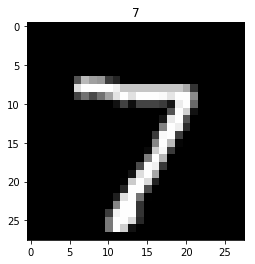

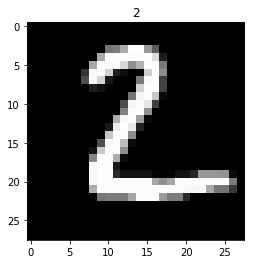

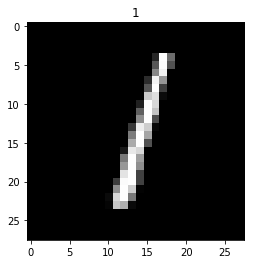

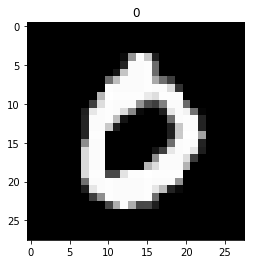

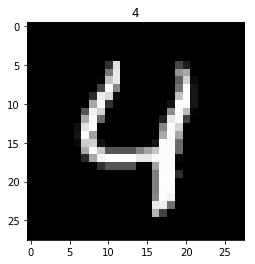

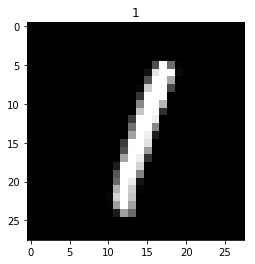

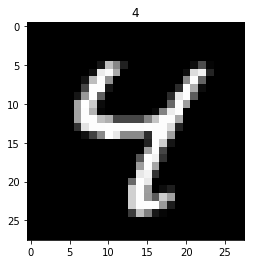

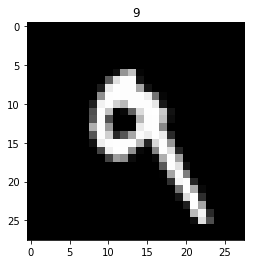

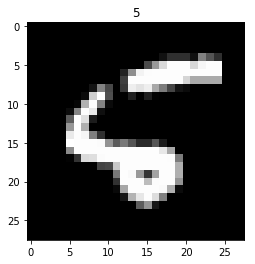

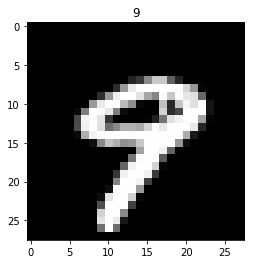

In [0]:
for x,y in zip(x_input_test[:10], pred[:10]):
  plt.imshow(x.squeeze(), 'gray')
  plt.title(y.argmax())
  plt.show()

In [0]:
(pred.argmax(-1)==y_test).sum() / float(len(y_test))

0.9895